In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [3]:
cd '/content/drive/My Drive/Colab Notebooks/matrix_transformation'

/content/drive/My Drive/Colab Notebooks/matrix_transformation


In [4]:
ls data

men_shoes.csv


In [5]:
df = pd.read_csv('data/men_shoes.csv')
df.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(18280, 48)

In [6]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price = np.mean(df['prices_amountmin'])

In [11]:
#MEAN
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

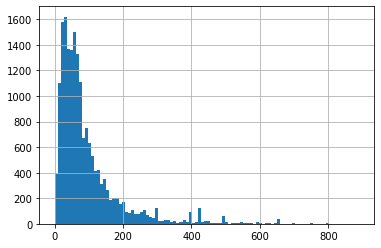

In [16]:
df['prices_amountmin'].hist(bins=100)

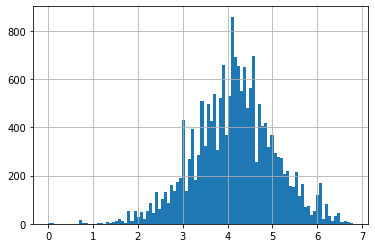

In [15]:
np.log1p(df['prices_amountmin']).hist(bins=100)

In [17]:
#MEDIAN
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [18]:
#LOG TRANSFORMATION
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [19]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [49]:
def run_model_of_feats(features):
  X = df[features].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)
  scores = cross_val_score(model ,X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

#match every brand name a unique number
df['brand_cat'] = df['brand'].factorize()[0]
print('BRAND - Mean scores, Std scores: {}'.format(run_model_of_feats(['brand_cat'])))

df['manufacturer_cat'] = df['manufacturer'].factorize()[0]
print('MANUFACTURER - Mean scores, Std scores: {}'.format(run_model_of_feats(['manufacturer_cat'])))

print('BRAND & MANUFACTURER - Mean scores, Std scores: {}'.format(run_model_of_feats(['brand_cat','manufacturer_cat'])))

BRAND - Mean scores, Std scores: (-58.38655694633361, 4.223555478221712)
MANUFACTURER - Mean scores, Std scores: (-63.133649278023746, 3.394307434888982)
BRAND & MANUFACTURER - Mean scores, Std scores: (-58.53930419908596, 4.3112232316154415)


In [50]:
ls

'#1_Matrix'/   data/   HelloGithub.ipynb   LICENSE   README.md


In [51]:
ls '#1_Matrix'

Data_csv_save.ipynb  Data.ipynb  Model_easy.ipynb


In [0]:
!git config --global user.email "suzanne.piatek@gmail.com"
!git config --global user.name "Zuzanna"

In [0]:
!git commit -m "Read Men's Shoe Prices dataset from data.world"

In [0]:
!git push -u origin master